<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.419980,57.199886,65.049419,89.726600,-28.835050,265.560835,277.214363,-11.653528
1,0.0,1.0,33.420207,31.941934,80.745452,47.846681,-43.456085,160.498189,212.514782,-52.016593
2,0.0,2.0,22.435136,44.755769,89.740668,47.774880,-13.990925,200.715528,228.228975,-27.513447
3,0.0,3.0,65.695088,94.027669,75.731524,41.988499,-8.344421,279.098359,291.691021,-12.592662
4,0.0,4.0,33.522277,63.715699,75.633926,44.209301,-47.296610,179.784592,243.511116,-63.726524
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.652085,55.972099,67.445125,49.667774,-70.886369,192.850713,271.533948,-78.683235
119996,999.0,116.0,30.651801,57.062102,32.291188,84.878937,-9.234199,205.649829,197.094430,8.555399
119997,999.0,117.0,30.363590,52.341914,39.255485,55.921222,-36.398754,151.483457,181.614668,-30.131212
119998,999.0,118.0,46.043298,87.960731,76.663877,96.730444,-12.708677,304.689673,305.820371,-1.130698


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.419980,57.199886,65.049419,89.726600,-28.835050,265.560835,277.214363,-11.653528
1,0.0,1.0,33.420207,31.941934,80.745452,47.846681,-43.456085,160.498189,212.514782,-52.016593
2,0.0,2.0,22.435136,44.755769,89.740668,47.774880,-13.990925,200.715528,228.228975,-27.513447
3,0.0,3.0,65.695088,94.027669,75.731524,41.988499,-8.344421,279.098359,291.691021,-12.592662
4,0.0,4.0,33.522277,63.715699,75.633926,44.209301,-47.296610,179.784592,243.511116,-63.726524
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.652085,55.972099,67.445125,49.667774,-70.886369,192.850713,271.533948,-78.683235
119996,999.0,116.0,30.651801,57.062102,32.291188,84.878937,-9.234199,205.649829,197.094430,8.555399
119997,999.0,117.0,30.363590,52.341914,39.255485,55.921222,-36.398754,151.483457,181.614668,-30.131212
119998,999.0,118.0,46.043298,87.960731,76.663877,96.730444,-12.708677,304.689673,305.820371,-1.130698


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.419980  57.199886  65.049419  89.726600 -28.835050   
      1.0    33.420207  31.941934  80.745452  47.846681 -43.456085   
      2.0    22.435136  44.755769  89.740668  47.774880 -13.990925   
      3.0    65.695088  94.027669  75.731524  41.988499  -8.344421   
      4.0    33.522277  63.715699  75.633926  44.209301 -47.296610   
...                ...        ...        ...        ...        ...   
999.0 115.0  80.652085  55.972099  67.445125  49.667774 -70.886369   
      116.0  30.651801  57.062102  32.291188  84.878937  -9.234199   
      117.0  30.363590  52.341914  39.255485  55.921222 -36.398754   
      118.0  46.043298  87.960731  76.663877  96.730444 -12.708677   
      119.0  79.879431  54.350394  98.625039  67.888612 -31.036055   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    265.560835  277.214363 -11.653528  
      1.0    160.498189  212.514782 -52.016593  
      2.0    200.715528  228.228975 -27.513447  
      3.0    279.098359  291.691021 -12.592662  
      4.0    179.784592  243.511116 -63.726524  
...                 ...         ...        ...  
999.0 115.0  192.850713  271.533948 -78.683235  
      116.0  205.649829  197.094430   8.555399  
      117.0  151.483457  181.614668 -30.131212  
      118.0  304.689673  305.820371  -1.130698  
      119.0  279.707421  307.368067 -27.660646  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.419980  57.199886  65.049419  89.726600 -28.835050   
      1.0    33.420207  31.941934  80.745452  47.846681 -43.456085   
      2.0    22.435136  44.755769  89.740668  47.774880 -13.990925   
      3.0    65.695088  94.027669  75.731524  41.988499  -8.344421   
      4.0    33.522277  63.715699  75.633926  44.209301 -47.296610   
...                ...        ...        ...        ...        ...   
999.0 115.0  80.652085  55.972099  67.445125  49.667774 -70.886369   
      116.0  30.651801  57.062102  32.291188  84.878937  -9.234199   
      117.0  30.363590  52.341914  39.255485  55.921222 -36.398754   
      118.0  46.043298  87.960731  76.663877  96.730444 -12.708677   
      119.0  79.879431  54.350394  98.625039  67.888612 -31.036055   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    265.560835  277.214363 -11.653528  
      1.0    160.498189  212.514782 -52.016593  
      2.0    200.715528  228.228975 -27.513447  
      3.0    279.098359  291.691021 -12.592662  
      4.0    179.784592  243.511116 -63.726524  
...                 ...         ...        ...  
999.0 115.0  192.850713  271.533948 -78.683235  
      116.0  205.649829  197.094430   8.555399  
      117.0  151.483457  181.614668 -30.131212  
      118.0  304.689673  305.820371  -1.130698  
      119.0  279.707421  307.368067 -27.660646  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,72.419980,57.199886,65.049419,89.726600,-28.835050,265.560835,277.214363,-11.653528
1,0.0,1.0,33.420207,31.941934,80.745452,47.846681,-43.456085,160.498189,212.514782,-52.016593
2,0.0,2.0,22.435136,44.755769,89.740668,47.774880,-13.990925,200.715528,228.228975,-27.513447
3,0.0,3.0,65.695088,94.027669,75.731524,41.988499,-8.344421,279.098359,291.691021,-12.592662
4,0.0,4.0,33.522277,63.715699,75.633926,44.209301,-47.296610,179.784592,243.511116,-63.726524
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.652085,55.972099,67.445125,49.667774,-70.886369,192.850713,271.533948,-78.683235
119996,999.0,116.0,30.651801,57.062102,32.291188,84.878937,-9.234199,205.649829,197.094430,8.555399
119997,999.0,117.0,30.363590,52.341914,39.255485,55.921222,-36.398754,151.483457,181.614668,-30.131212
119998,999.0,118.0,46.043298,87.960731,76.663877,96.730444,-12.708677,304.689673,305.820371,-1.130698


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    72.419980  57.199886  65.049419  89.726600 -28.835050   
      1.0    33.420207  31.941934  80.745452  47.846681 -43.456085   
      2.0    22.435136  44.755769  89.740668  47.774880 -13.990925   
      3.0    65.695088  94.027669  75.731524  41.988499  -8.344421   
      4.0    33.522277  63.715699  75.633926  44.209301 -47.296610   
...                ...        ...        ...        ...        ...   
999.0 115.0  80.652085  55.972099  67.445125  49.667774 -70.886369   
      116.0  30.651801  57.062102  32.291188  84.878937  -9.234199   
      117.0  30.363590  52.341914  39.255485  55.921222 -36.398754   
      118.0  46.043298  87.960731  76.663877  96.730444 -12.708677   
      119.0  79.879431  54.350394  98.625039  67.888612 -31.036055   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    265.560835  277.214363 -11.653528  
      1.0    160.498189  212.514782 -52.016593  
      2.0    200.715528  228.228975 -27.513447  
      3.0    279.098359  291.691021 -12.592662  
      4.0    179.784592  243.511116 -63.726524  
...                 ...         ...        ...  
999.0 115.0  192.850713  271.533948 -78.683235  
      116.0  205.649829  197.094430   8.555399  
      117.0  151.483457  181.614668 -30.131212  
      118.0  304.689673  305.820371  -1.130698  
      119.0  279.707421  307.368067 -27.660646  

[120000 rows x 8 columns]

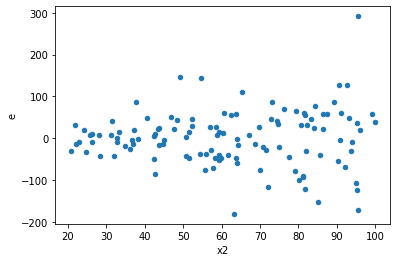

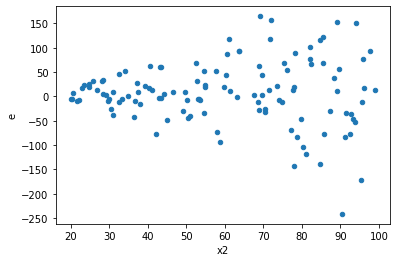

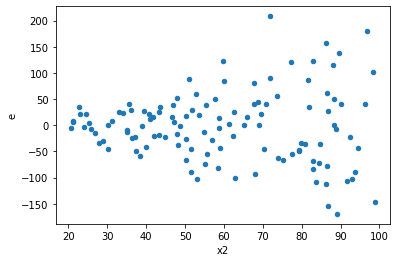

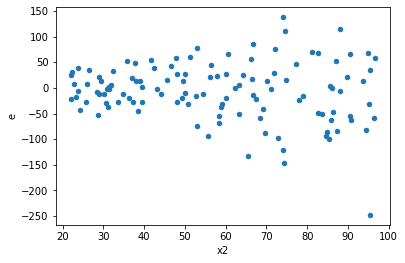

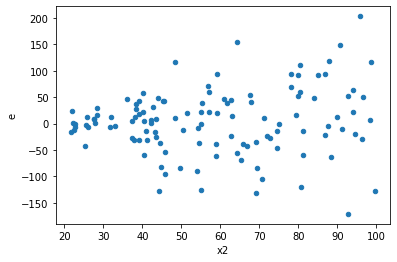

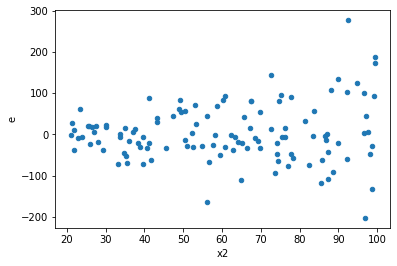

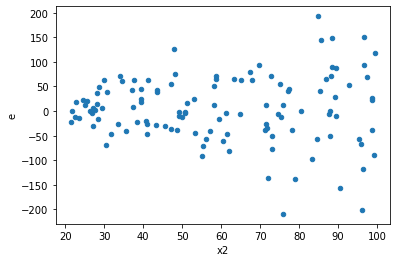

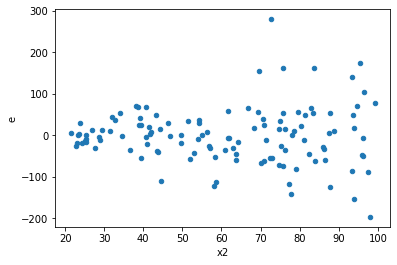

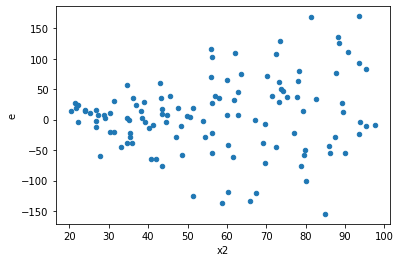

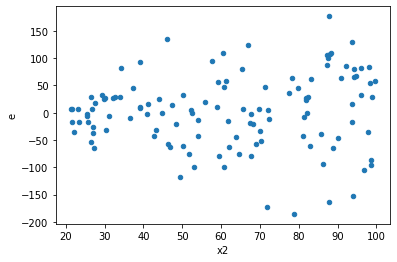

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,89204.54680810416,297876.69745817676,2027.3760638205492,6769.92494223129,3.339254646951638,0.00011085599270344026,0.9999445720036483,5.542799635172013e-05,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,41733.07302791574,287445.6597099666,948.4789324526305,6532.855902499242,6.887718513268622,2.598065318437648e-09,0.9999999987009673,1.299032659218824e-09,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,49954.36681014985,379120.31160067965,1135.3265184124966,8616.370718197264,7.58933274124994,5.035827310706509e-10,0.9999999997482086,2.5179136553532544e-10,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,34044.30635952599,254932.04384289018,773.7342354437725,5793.910087338413,7.488243148521581,6.333522595269869e-10,0.9999999996833239,3.1667612976349346e-10,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,62524.74946624298,287717.12135216716,1421.017033323704,6539.0254852765265,4.601651726849465,1.4472528486741965e-06,0.9999992763735757,7.236264243370982e-07,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,71655.0185679683,377970.40457788494,1628.523149272007,8590.236467679204,5.274862977243687,1.8771235743564318e-07,0.9999999061438213,9.385617871782159e-08,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,67446.47211756975,377007.0399593714,1532.8743663084033,8568.34181725844,5.589722162223536,7.639369381529093e-08,0.9999999618031531,3.8196846907645465e-08,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,57862.25063082406,389375.15163412225,1315.051150700547,8849.43526441187,6.729346808827661,3.826371219872726e-09,0.9999999980868144,1.913185609936363e-09,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,37134.2926524249,241640.54773621703,843.9611966460204,5491.830630368569,6.507207502185657,6.660005436032179e-09,0.9999999966699973,3.3300027180160896e-09,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,89204.54680810416,297876.69745817676,2027.3760638205492,6769.92494223129,3.339254646951638,0.00011085599270344026,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,41733.07302791574,287445.6597099666,948.4789324526305,6532.855902499242,6.887718513268622,2.598065318437648e-09,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,49954.36681014985,379120.31160067965,1135.3265184124966,8616.370718197264,7.58933274124994,5.035827310706509e-10,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,34044.30635952599,254932.04384289018,773.7342354437725,5793.910087338413,7.488243148521581,6.333522595269869e-10,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,62524.74946624298,287717.12135216716,1421.017033323704,6539.0254852765265,4.601651726849465,1.4472528486741965e-06,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,71655.0185679683,377970.40457788494,1628.523149272007,8590.236467679204,5.274862977243687,1.8771235743564318e-07,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,67446.47211756975,377007.0399593714,1532.8743663084033,8568.34181725844,5.589722162223536,7.639369381529093e-08,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,57862.25063082406,389375.15163412225,1315.051150700547,8849.43526441187,6.729346808827661,3.826371219872726e-09,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,37134.2926524249,241640.54773621703,843.9611966460204,5491.830630368569,6.507207502185657,6.660005436032179e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    998
Reject005=1 : Homoscedasticity        2
Name: Result_test, dtype: int64